In [12]:
# Importing Libraries
import torch
import numpy as np
import torchvision
from torch.utils.data import DataLoader
from torch import nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch.nn import functional as F
from matplotlib import pyplot as plt
import random

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # checking device type
print(device)

cuda


In [4]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encode_sequence = nn.Sequential(
            nn.Linear(784, 500), 
            nn.ReLU(), 
            nn.Linear(500, 300), 
            nn.ReLU(), 
            nn.Linear(300, 80), 
            nn.ReLU(), 
            nn.Linear(80, 10)
            )
        self.decode_sequence = nn.Sequential(
            nn.Linear(10, 80), 
            nn.ReLU(), 
            nn.Linear(80, 300), 
            nn.ReLU(), 
            nn.Linear(300, 500), 
            nn.ReLU(), 
            nn.Linear(500, 784) ,
            nn.Sigmoid()
            )

    def forward(self, X):
        encoded_data = self.encode_sequence(X)
        decoded_data = self.decode_sequence(encoded_data)
        return decoded_data

In [5]:
model = autoencoder().to(device)
learning_rate = 0.001
num_epoch = 3
batch_size = 128
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
train_dataset = datasets.MNIST(root = './dataset', train= True, transform = transforms.ToTensor(), download = True)
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_dataset = datasets.MNIST(root = './dataset', train= False, transform = transforms.ToTensor(), download = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

9913344it [00:05, 1875326.35it/s]                             


Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw



29696it [00:00, 14707055.33it/s]         

Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



1649664it [00:00, 3058843.33it/s]                             


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw



5120it [00:00, 10172826.38it/s]         

Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



In [7]:
losses = []
for epoch in range(num_epoch): # number of iterations
    for i, (data, targets) in enumerate(train_loader , 0): # one min-batch goes through each iteration of size 64
        # Converting to acceptable format
        data = data.to(device=device)
        
        data = data.reshape(-1, 28*28)
        
        # Forward pass
        output = model(data)
        loss = criterion(output, data)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #to convert cuda type loss to numpy type
        loss=loss.detach().cpu().numpy()
        losses.append(loss)

In [8]:
#Reshaping the data
data = data.reshape(-1 , 28,28)
output = output.reshape(-1, 28, 28)

print(data.shape, output.shape)

torch.Size([96, 28, 28]) torch.Size([96, 28, 28])


In [9]:
#To convert cuda tensor to numpy array
data= data.detach().cpu().numpy()
output = output.detach().cpu().numpy()

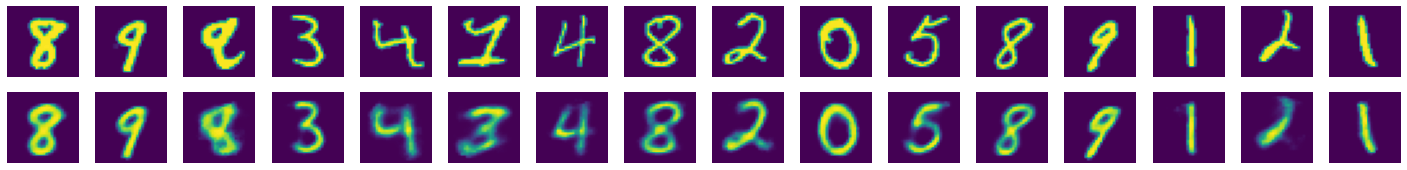

In [10]:
plt.figure(figsize = (25,50))

for i in range(16):
    plt.subplot(32,16,i+1)
    plt.imshow(data[i])
    plt.axis('off')

    plt.subplot(32,16,i + 17)
    plt.imshow(output[i])
    plt.axis('off')

plt.show()

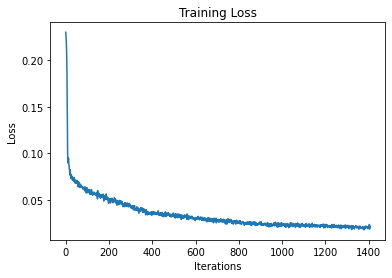

In [11]:
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses)
plt.show()

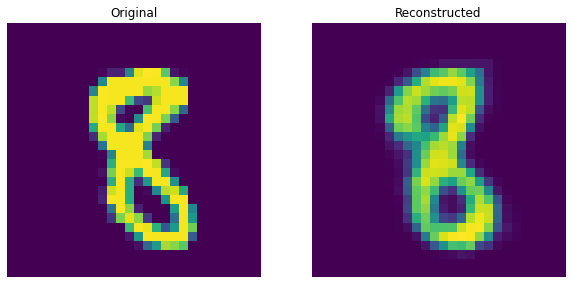

In [14]:
index= random.randint(0, len(test_dataset))

with torch.no_grad():
    data= test_dataset[index][0].view(-1, 28*28)
    data= data.to(device)
    output = model(data)
    
    data=data.detach().cpu().numpy()
    data = data.reshape(-1, 28, 28)

    output = output.detach().cpu().numpy()
    output = output.reshape(-1, 28, 28)

    plt.figure(figsize = (10,25))
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(data[0])
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title('Reconstructed')
    plt.imshow(output[0])
    plt.axis('off')
    plt.show()